# Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами.

Выполнил студент гр. 9381 Птичкин Сергей, вариант 12.

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при $t \rightarrow +\infty$.

## Основные теоретические положения
 
 Системой однородных линейных дифференциальных уравнений с периодическими коэффициентами называется система однородных линейных ОДУ следующего вида:
 
 $$ X' = A(t) X, \;\; A(t + T) = A(t), \;\; t \ge 0 \;\;\;\;\;\;\;\; (0) $$
 $$ X' = (x_1', \dots, x_n')^T, \;\; X = (x_1, \dots, x_n)^T, \;\; A(t) = || a_{ij}(t) ||, \;\; a_{ij}(t + T) = a_{ij}(t)$$
 
 Число $T > 0$ называют периодом коэффициентов системы $(0)$.
 
 Фундаментальной матрицей системы $(0)$ называется такая матрица $\Phi(t)$, что ее стобцы являются линейно независимыми решениями системы $(0)$. В матричном виде: $\Phi' = A(t)\Phi$.
 
 Основной матрицей для фундаментальной матрицы $\Phi(t)$ называется такая матрица $C$, что $\Phi(t + T) = \Phi(t)C, \; \forall t \ge 0$.
 
 Спектральным радиусом матрицы $C$ называется число $r(C) = \max\limits_{i}|\lambda_i|$, где $\lambda_i$ - собственные числа матрицы $C$.

## Постановка задачи
 
 Дано дифференциальное уравнение:
 
 $$ x'' + a(p,t)x = 0, \;\; a(p,t) = p + b(t), \;\; b(t + T) = b(t), $$
 
 где $p$ - параметр.
 
 Данное уравнение сводится к системе двух уравнений I-го порядка:
 
 $$
 \begin{cases}
     u'_1 = u_2, \\
     u'_2 = -a(p,t)u_1;
 \end{cases}
 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; (1)
 $$
 
 Здесь $u_1(t) = x(t), \; u_2(t) = x'(t)$.
 
 Необходимо провести исследование устойчивости однородного линейного уравнения. Дальнейшие рассуждения применимы к любой линейной периодической системе, а не только к системе вида $(1)$.

## Схема решения
 
 1. Задаем массив значений параметра $p$. Например, $p$ меняется от $0.1$ до $5$ с шагом $0.05$. Для каждого значения $p$ проделаем следующие действия:
 
 2. Вычисляем значение фундаментальной матрицы системы $(1)$ при $t = T$ с помощью любой программы численного решения задачи
 Коши.
 Для этого решаем две задачи Коши с начальными векторами $V_1 = (1, 0)^T$ и $V_2 = (0, 1)^T$ на отрезке $[0, T]$. Пусть вектор-функции $U(t, V_1), \; U(t, V_2)$ – решения этих задач. Они являются столбцами фундаментальной матрицы $\Phi(t)$, удовлетворяющей условию $\Phi(0) = E$. Основную матрицу $C$ для $\Phi(t)$ получаем из формулы $C = \Phi(T)$.
 Столбцы матрицы $C$ это векторы $U(T, V_1), U(T, V_2)$;
 
 3. Вычисляем собственные числа матрицы 𝐶 и ее спектральный радиус, т.е.
 $$ r(p) = \max\limits_{j = 1,2}|\lambda_j|.$$
 В результате имеем массив значений $r(p)$;
 
 4. Вывод об устойчивости или неустойчивости делается в зависимости от значения $r(p)$.
 
 Рекомендуется построить график этой зависимости, из которого с достаточной точностью можно определить точку 𝑝0, которая разделяет зоны устойчивости и неустойчивости, в которых $r \le 1$ и $r \gt 1$. Более точно
 вычисляется методом половинного деления.
 
 Матрицу $C$ можно найти только приближенно, решая численно две задачи Коши.

## Выполнение работы
 
 ### Вариант 17
 
 Функция $b(t)$ задана следующим выражением:
 
 $$ b(t) = |cos(2t)| $$
 
 Объявим функции  $b(t)$  и  $a(p,t)$ , а также их период $ T=\pi/2 $:

In [6]:
from math import log, cos, pi
from matplotlib.pyplot import grid, legend, plot, xlabel, ylabel
from numpy import arange, array
from numpy.linalg import eigvals
from scipy import integrate

%matplotlib inline

def b(t):
    return abs(cos(2*t))

def a(p, t):
    return p + b(t)

T = pi / 2

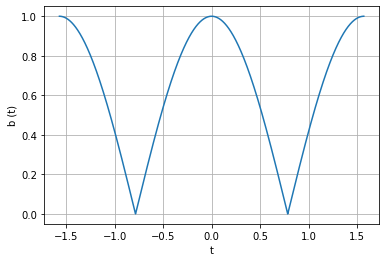

In [48]:
t_val = arange(-T, T, 0.001)
b_val = [b(t) for t in t_values]

xlabel("t")
ylabel("b (t)")
plot(t_val, b_val)
grid(True)

Зададим массив значений параметра p из промежутка [0, 5] с шагом 0.01:

In [49]:
step = 0.01
p_val = arange(0, 4.01, step)

Для каждого параметра $p$ найдем спектральный радиус основной матрицы $C$. Для этого сначала находится фундаментальная матрица $\Phi(p, t)$, удовлетворяющей условию  $\Phi(p, 0) = E$. Далее находится основная матрица $C(p) = \Phi(p, T)$ и ее спектральный радиус $r(p)$:

In [50]:
interval = (0, T)
v_1 = (1, 0)
v_2 = (0, 1)
sr_val = []

for p in p_val:
    de_system_func = lambda t, values: [values[1], -a(p, t) * values[0]]
    u1 = integrate.solve_ivp(de_system_func, interval, v_1)
    u2 = integrate.solve_ivp(de_system_func, interval, v_2)
    c = array([[u1.y[0][-1], u2.y[0][-1]],
               [u1.y[1][-1], u2.y[1][-1]]])
    sr_val.append(max(abs(eigvals(c))))


Построим график спектрального радиуса

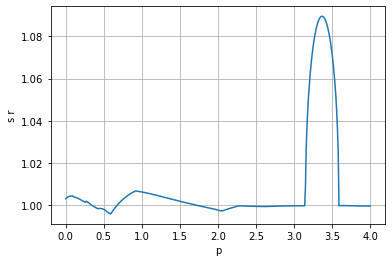

In [51]:
xlabel("p")
ylabel("s r")
plot(p_val, sr_val)
grid(True)

Из полученного графика можем определить точку $p_0$, разделяющую зоны устойчивости и неустойчивости с точностью с точностью $|r(p_0) - 1| < 0.001$:

In [53]:
p0 = None
rp0 = None

for i in range(1, len(sr_val)):
    if abs(sr_val[-i] - 1) > 0.001:
        p0 = p_val[-i + 1]
        rp0 = sr_val[-i + 1]
        break

print(f"p0 = {p0}, r(p0) = {rp0}")

p0 = 3.59, r(p0) = 0.9998042687874945


Построим график спектрального радиуса основной матрицы при различных параметрах $p$ с отмеченной на нем точкой $p_0$:

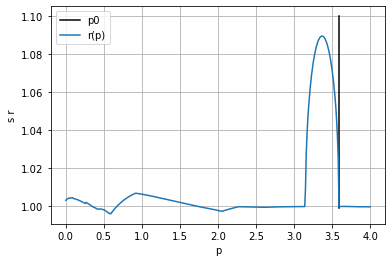

In [54]:
xlabel("p")
ylabel("s r")
plot([p0, p0], [0.999, 1.1], color="black", label="p0")
plot(p_val, sr_val, label="r(p)")
grid(True)
legend()

Рассмотрим поближе интервал $p \in [3, 3.6]$

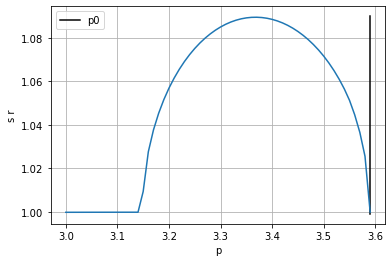

In [57]:
xlabel("p")
ylabel("s r")
plot([p0, p0], [0.999, 1.09], color="black", label="p0")
plot(p_val[300:360], sr_val[300:360])
grid(True)
legend()

Можно сделать вывод о том,что граница между зонами устойчивости и неустойчивости равна $p_0 = 3.59$. При значениях $p < p_0$ наблюдаются области со значением $r(p) > 1$. При таких значениях $p$ по крайней мере часть решений системы не ограничена.

## Выводы



В ходе практической работы было проведено изучение устойчивости системы однородных линейных ОДУ с переодическими коэффициетами при $t \rightarrow +\infty$.
 
 Были получены следующие результаты:
 - Найдена граница зоны устойчивости и неустойчивости $p_0 = 3.59$
 - При $p < p_0 = 3.59$ система является неустойчивой
 - При $p >= p_0 = 3.59$ система является устойчивой
 
 
 Значение $p_0$ было найдено с точностью $|r(p_0) - 1| < 0.001$.